In [25]:
#!/usr/bin/env python
# coding: utf-8


#import modules for scikit learn, data frame viewing, etc. 
import math
import io
import pandas as pd  
import numpy as np  
import matplotlib
import matplotlib.pyplot as pp  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import scipy.stats
import scipy.optimize
import scipy.spatial
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
from yellowbrick.regressor import AlphaSelection




In [26]:

#reads in csv file, data extracted using Scott's scraper
dataset = pd.read_csv('ff_dataWeeklyQB.csv')
#prints description for our data set
pd.set_option('display.max_columns', 50)
dataset.describe()



,l_proj,l_actual,l_points1,l_points2,l_points3,l_points4,l_points5,l_points6,l_points7,l_points8,l_ppgcurrent,l_pointspg18,l_passydpg18,l_passtdpg18,l_passintpg18,l_rushydpg18,l_rushtdpg18,l_rush1stpg18,l_2ptpg18,l_fumblepg18,l_touchdown18,l_runnerQB18,l_pointspg17,l_passydpg17,l_passtdpg17,l_passintpg17,l_rushydpg17,l_rushtdpg17,l_rush1stpg17,l_2ptpg17,l_fumblepg17,l_touchdown17,l_runnerQB17
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,99.685714,102.314286,17.796571,14.626571,14.306000,12.078667,12.578000,13.702057,13.577238,13.087959,13.969133,18.006404,247.353705,1.644649,0.699824,13.871170,0.125531,1.122973,0.093000,0.209687,3.487139,378.598454,16.579627,232.978800,1.571763,0.747559,13.197921,0.103169,0.929040,0.068238,0.186603,3.083280,391.137030
std,172.471101,66.451562,8.284570,9.102210,10.289163,10.229059,11.707721,10.662922,11.207396,9.803144,7.327759,3.765686,59.823898,0.539235,0.292187,10.481471,0.101550,0.613171,0.086153,0.123191,1.857778,480.369019,3.639345,37.519095,0.434163,0.171386,10.725861,0.107012,0.634698,0.072660,0.110147,1.587304,526.552619
min,4.000000,7.000000,5.360000,-0.840000,0.000000,-0.520000,-2.000000,-1.080000,-6.660000,0.000000,0.875000,4.951875,4.000000,0.000000,0.062500,0.437500,0.000000,0.062500,0.000000,0.000000,0.015625,0.250000,4.968571,76.714286,0.583333,0.285714,-0.125000,0.000000,0.062500,0.000000,0.000000,0.510204,0.003906
25%,29.000000,44.000000,10.820000,10.310000,4.925000,0.180000,0.000000,3.660000,2.930000,3.290000,7.999625,16.461222,242.656250,1.387500,0.598214,6.437500,0.062500,0.741667,0.000000,0.125000,2.403828,53.041016,15.420337,231.867353,1.406250,0.656250,5.262500,0.000000,0.487981,0.000000,0.160685,2.404135,33.563550
50%,54.000000,91.000000,16.600000,15.000000,15.100000,13.460000,11.940000,12.600000,13.370000,12.600000,16.160000,18.006404,253.062500,1.644649,0.699824,13.871170,0.125000,1.122973,0.093000,0.209687,3.487112,330.785156,16.579627,232.978800,1.562500,0.750000,13.197921,0.103169,0.929040,0.068238,0.186603,3.062500,384.356491
75%,82.000000,158.500000,25.120000,18.870000,21.670000,21.190000,20.260000,20.540000,20.870000,21.300000,18.593500,20.302188,273.038194,1.918831,0.775000,18.000000,0.165179,1.240385,0.133929,0.250000,3.876953,396.869538,17.509375,253.569231,1.718750,0.833929,13.583337,0.103554,0.966155,0.078068,0.200000,3.184218,391.137030
max,914.000000,238.000000,35.400000,36.880000,41.340000,29.480000,44.740000,34.640000,42.760000,31.760000,28.514286,26.942500,320.562500,3.125000,1.500000,43.437500,0.375000,2.812500,0.312500,0.545455,10.563000,2168.066400,25.551429,286.062500,2.714286,1.142857,47.125000,0.375000,2.875000,0.307692,0.538462,9.000000,2537.640625


,l_points8,Value
0,mean,13.087959
1,median,12.600000


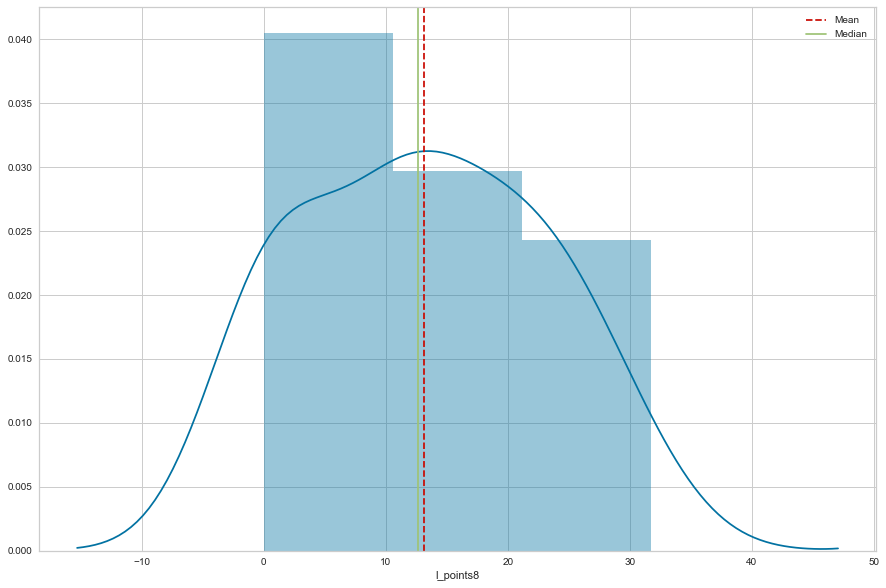

In [27]:
#describes values chosen 
vals = ['l_proj','l_actual','l_points1','l_points2','l_points3','l_points4','l_points5','l_points6','l_points7','l_ppgcurrent','l_pointspg18','l_passydpg18','l_passtdpg18','l_passintpg18','l_rushydpg18','l_rushtdpg18','l_rush1stpg18', 'l_touchdown18','l_runnerQB18','l_touchdown18','l_runnerQB18','l_pointspg17','l_passydpg17','l_passtdpg17','l_passintpg17','l_rushydpg17','l_rushtdpg17','l_rush1stpg17','l_2ptpg17','l_fumblepg17','l_touchdown17','l_runnerQB17']
 
#predictors
X = dataset[vals].values

#target variable
y = dataset['l_points8'].values

#Plot creation
pp.figure(figsize=(15,10))
pp.tight_layout()

seabornInstance.distplot(dataset['l_points8'])
mean=dataset['l_points8'].mean()
median=dataset['l_points8'].median()

pp.axvline(mean, color='r', linestyle='--')
pp.axvline(median, color='g', linestyle='-')


pp.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'l_points8': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

In [28]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#summary Statistics Prior to Lasso
print(OLS(y_train,X_train).fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.377
Model:                            OLS   Adj. R-squared (uncentered):            -16.456
Method:                 Least Squares   F-statistic:                            0.02237
Date:                Fri, 01 Nov 2019   Prob (F-statistic):                        1.00
Time:                        17:49:49   Log-Likelihood:                         -111.85
No. Observations:                  28   AIC:                                      277.7
Df Residuals:                       1   BIC:                                      313.7
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

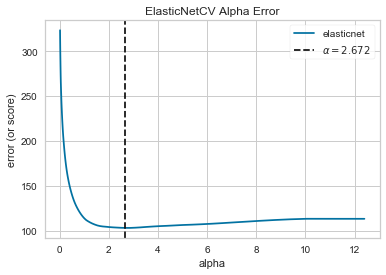

In [29]:
from sklearn.linear_model import ElasticNetCV
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [30]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.184, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


coefs = pd.DataFrame({ 'Variables': vals, 'Coefficients': clf.coef_})
display(coefs)


print("Intercept: " + str(clf.intercept_))





ElasticNet Predict with transformations:


,Variables,Coefficients
0,l_proj,0.922886
1,l_actual,-0.000000
2,l_points1,-1.490145
3,l_points2,-2.886740
4,l_points3,2.816669
5,l_points4,1.951143
6,l_points5,-0.889102
7,l_points6,-0.318270
8,l_points7,1.079459
9,l_ppgcurrent,4.543748


Intercept: 13.140306122448981


In [31]:
#Displays Residuals in Tabular Format
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

with pd.option_context("display.max_rows", 100):
    display(dfElastic)

,Actual,Predicted
0,10.48,20.664658
1,18.29,6.503365
2,10.04,18.725585
3,10.10,16.533665
4,0.00,17.749545
5,18.36,15.207836
6,22.88,21.169265


Elastic Graph


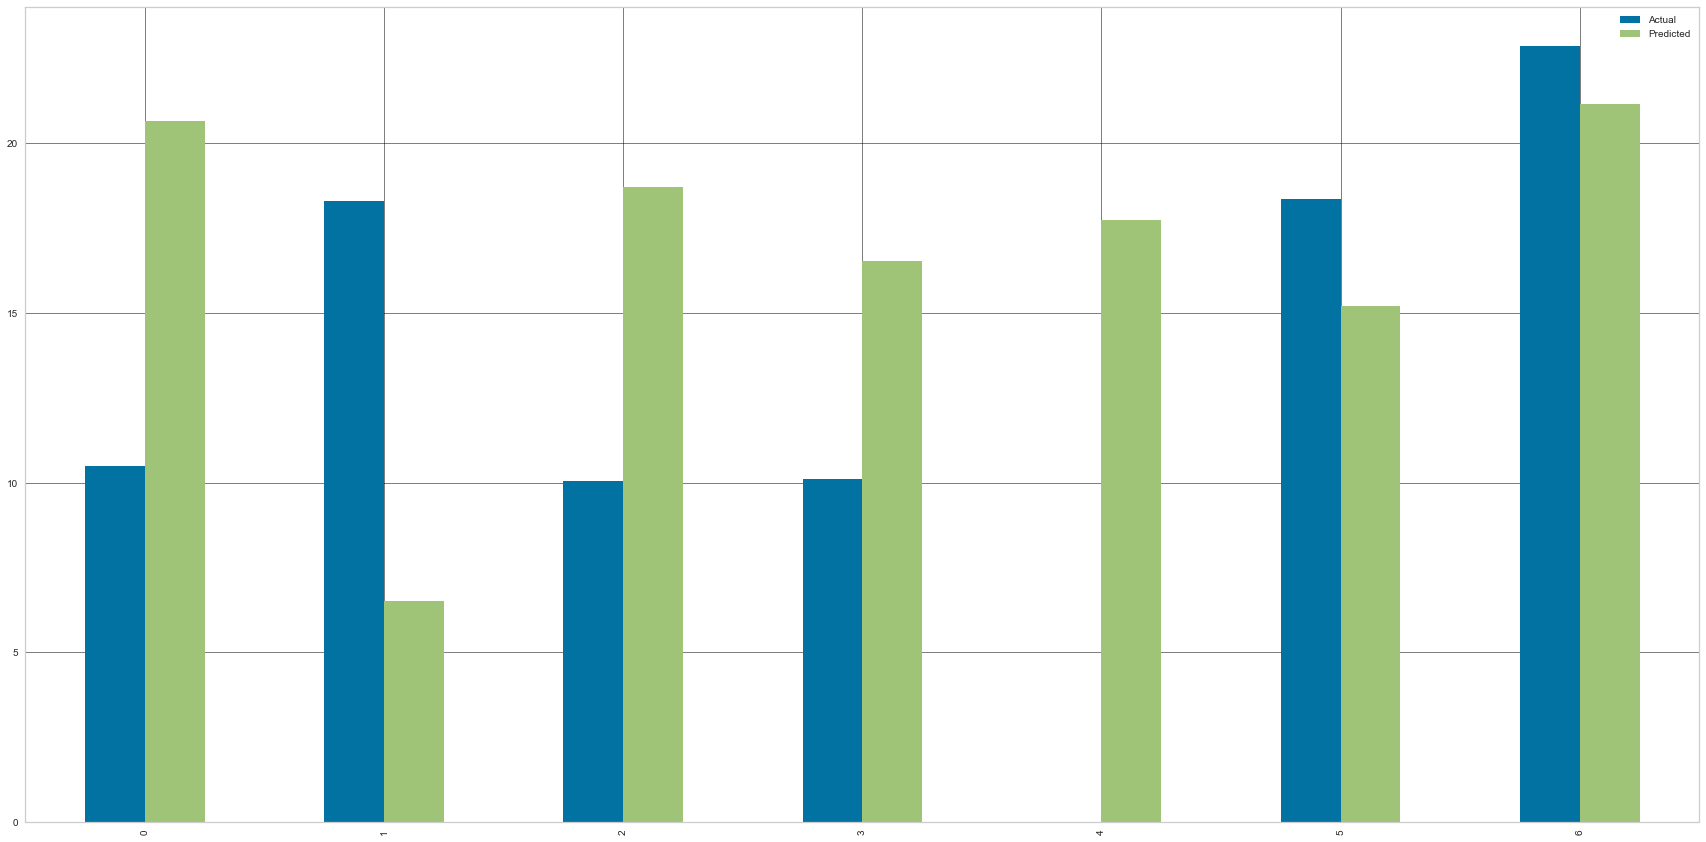

In [32]:
#Displays Residuals in Graphical Format
print("Elastic Graph")
dfElastic.plot(kind='bar',figsize=(30,15))
pp.grid(which='major', linestyle='-', linewidth='0.5', color='black')
pp.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pp.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 8.52899821434646
Mean Squared Error: 98.19893827295398
Root Mean Squared Error: 9.909537742647434


In [34]:
import numpy as np
import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
bootstrap_iter = 10000    # designate the number of iterations for bootstrapping

accuracy = []
coefs = []
clf = linear_model.ElasticNet(alpha=.184, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
intercept =[]
for i in range(bootstrap_iter):
    X_, y_ = resample(X_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(X_test)
    acc = metrics.mean_squared_error(y_test, y_pred)
    accuracy.append(acc)
    coefs.append(clf.coef_)
    intercept.append(clf.intercept_)

average = []
for i in range(len(clf.coef_)):
    avg =0
    for j in range(len(coefs)):
        avg += coefs[j][i]
    average.append(avg)

avg_ints = sum(intercept)/len(intercept)

for x in range(len(average)):
    average[x] = average[x]/len(average)
    
 

avgPD = pd.DataFrame({'Variables': vals, 'Average Coefficients': clf.coef_})
avgintPD = pd.DataFrame({'Average Intercept': ['avg_int'], 'Value': [avg_ints]})

display(avgPD)
display(avgintPD)

print('Mean Squared Error:', mean(accuracy))



,Variables,Average Coefficients
0,l_proj,1.614321
1,l_actual,0.676626
2,l_points1,-2.146228
3,l_points2,0.638118
4,l_points3,2.553327
5,l_points4,0.326959
6,l_points5,0.000000
7,l_points6,0.000000
8,l_points7,3.288979
9,l_ppgcurrent,3.158497


,Average Intercept,Value
0,avg_int,13.116077


Mean Squared Error: 103.56135779100563


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10000, oob_score=True)
y = dataset['l_points8']
rf = rf.fit(X, y)
# check out accuracy 
print("Random Forest: " + str(rf.oob_score_))
 
#%%
# what features were important?
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
 
# Print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
 
# graph it 
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

ValueError: Unknown label type: 'continuous'